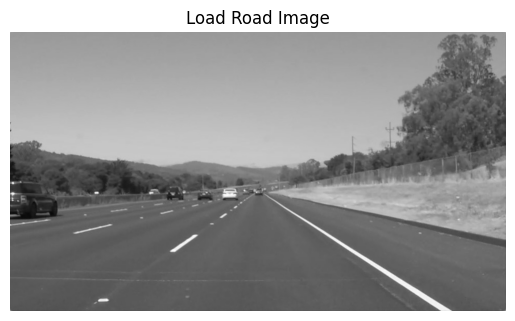

In [9]:
import cv2
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

url = 'https://raw.githubusercontent.com/udacity/CarND-LaneLines-P1/master/test_images/solidWhiteRight.jpg'
with urllib.request.urlopen(url) as resp:
  image = np.asarray(bytearray(resp.read()), dtype="int8")

#Decode the image using openCV
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Load Road Image')
plt.show()


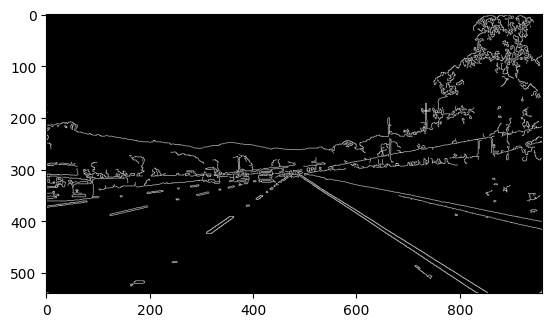

In [10]:
## Apply Canny Edge Detection

edges = cv2.Canny(gray,50, 150)
plt.imshow(edges, cmap='gray')


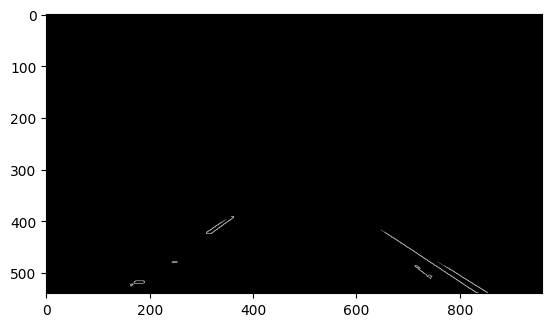

In [13]:
## Mask region of Interest ( Triangle Bottom )

import numpy as np

height, width = edges.shape
mask = np.zeros_like(edges)

# Triangle region
polygon = np.array([[
     (int(0.1 * width), height),
     (int(0.9*width), height),
     (int(0.5 * width), int(0.6*height))
                     ]], np.int32)

cv2.fillPoly(mask, polygon, 255)
masked = cv2.bitwise_and(edges, mask)

plt.imshow(masked, cmap='gray')

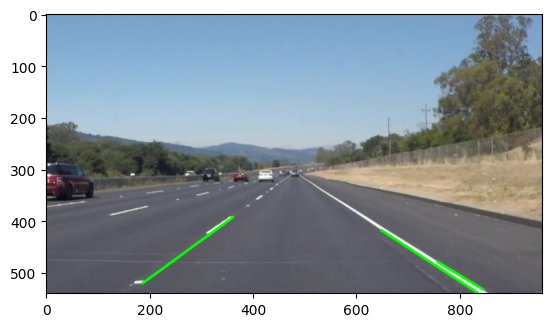

In [16]:
## Detect Lines Using Hough Transform

lines = cv2.HoughLinesP(masked, 1, np.pi/180, threshold=50, minLineLength= 50, maxLineGap = 150)

line_img = np.copy(image)

for line in lines:
    x1, y1,x2,y2 = line[0]
    cv2.line(line_img, (x1,y1), (x2, y2), (0,255,0), 4)

plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))